<a href="https://colab.research.google.com/github/raghunandepu/Natural_Language_Processing/blob/master/NLP%20with%20Tranformers/2_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Hugging face datasets

In [1]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 6.7 MB/s 
     |████████████████████████████████| 67 kB 6.3 MB/s 
     |████████████████████████████████| 596 kB 76.5 MB/s 
     |████████████████████████████████| 3.3 MB 56.8 MB/s 
     |████████████████████████████████| 895 kB 76.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
!pip install datasets

     |████████████████████████████████| 306 kB 9.7 MB/s 
     |████████████████████████████████| 1.1 MB 70.0 MB/s 
     |████████████████████████████████| 133 kB 85.0 MB/s 
     |████████████████████████████████| 243 kB 80.0 MB/s 
     |████████████████████████████████| 192 kB 75.9 MB/s 
     |████████████████████████████████| 160 kB 70.6 MB/s 
     |████████████████████████████████| 271 kB 71.7 MB/s 


In [3]:
from datasets import list_datasets
all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

There are 2495 datasets currently available on the Hub
The first 10 are: ['0n1xus/codexglue', '0n1xus/pytorrent-standalone', 'AConsApart/anime_subtitles_DialoGPT', 'AHussain0418/day2_data', 'AHussain0418/day4data', 'AHussain0418/demo_data', 'AI-Sweden/SuperLim', 'AI-it/khs_service_test', 'AI-it/korean-hate-speech', 'ARKseal/YFCC14M_subset_webdataset']


In [4]:
#Metadata of "emotion" dataset
metadata = list_datasets(with_details=True)[all_datasets.index("emotion")]
metadata

DatasetInfo: {
	id: emotion
	lastModified: 2021-06-21T09:22:33.839Z
	tags: ['pretty_name:Emotion', 'annotations_creators:machine-generated', 'language_creators:machine-generated', 'languages:en', 'licenses:unknown', 'multilinguality:monolingual', 'size_categories:10K<n<100K', 'source_datasets:original', 'task_categories:text-classification', 'task_ids:multi-class-classification', 'task_ids:text-classification-other-emotion-classification']
	private: False
	author: None
	description: Emotion is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise. For more detailed information please refer to the paper.
	citation: @inproceedings{saravia-etal-2018-carer,
    title = "{CARER}: Contextualized Affect Representations for Emotion Recognition",
    author = "Saravia, Elvis  and
      Liu, Hsien-Chi Toby  and
      Huang, Yen-Hao  and
      Wu, Junlin  and
      Chen, Yi-Shin",
    booktitle = "Proceedings of the 2018 Conference on Empiric

In [5]:
# Load the dataset
from datasets import load_dataset
emotions = load_dataset("emotion")
emotions

Downloading:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [7]:
type(train_ds)

datasets.arrow_dataset.Dataset

In [8]:
len(train_ds)

16000

In [9]:
train_ds[0]

{'label': 0, 'text': 'i didnt feel humiliated'}

In [10]:
train_ds.column_names

['text', 'label']

In [11]:
# Datatpyes under the hood
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)}


In [12]:
print(train_ds[:2])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'], 'label': [0, 0]}


In [13]:
print(train_ds['text'][:2])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake']


#### From Datasets to DataFrames
To enable the conversion, hf Datasets provides a set_format() method that allows us to change the output format of the Dataset. Note that this does not change the underlying data format (which is an Arrow table), and you can switch to another format later if needed:

In [14]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


The labels are represented as integers, so let’s use the int2str() method of the label feature to create a new column in our DataFrame with the corresponding label names:

In [15]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


#### Looking at the class distribution

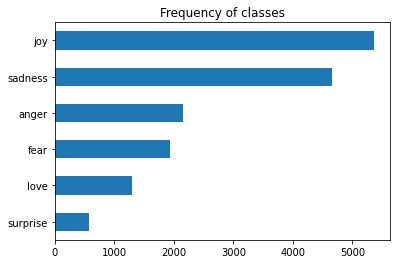

In [16]:
import matplotlib.pyplot as plt
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title("Frequency of classes")
plt.show()

#### How long are our tweets?

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


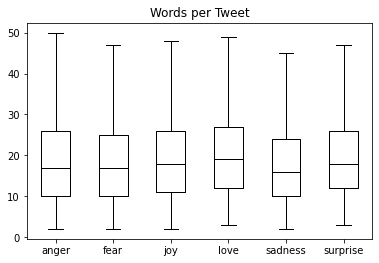

In [20]:
df['Words per Tweet'] = df['text'].str.split().apply(len)
df.boxplot("Words per Tweet", by="label_name", grid=False, showfliers=False, color='black')
plt.suptitle("")
plt.xlabel("")
plt.show()

In [21]:
# Reset the data format as we longer need DataFrame format
emotions.reset_format()

### From Text to Tokens